In [80]:
import pandas as pd
file = r"C:\Users\kuzik\Downloads\bestsellers with categories.csv"
df = pd.read_csv(file)

In [81]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [82]:
df.shape

(550, 7)

### О скольки книгах хранит данные датасет? 
#### Ответ: О 550 книгах.

In [83]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [84]:
df.isnull().sum()


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### Есть ли в каких либо переменных пропуски? 
#### (Нет)

In [85]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### Какие есть уникальные жанры
#### Ответ: Non Fiction, Fiction

<AxesSubplot:ylabel='Frequency'>

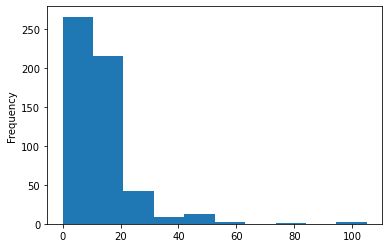

In [86]:
df['price'].plot(kind='hist')

In [87]:
df.agg({'price' : ['max', 'min', 'mean', 'median']})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


### Mаксимальная цена? Ответ: 105.0
### Минимальная цена? Ответ: 0.0
### Средняя цена? Ответ: 13.1
### Медианная цена? Ответ: 11.0

In [88]:
max_raiting = df.agg({'user_rating' : ['max']})
max_raiting

,user_rating
max,4.9


In [89]:
sum_best_books = df[df['user_rating'] == 4.9].count()
sum_best_books

name           52
author         52
user_rating    52
reviews        52
price          52
year           52
genre          52
dtype: int64

In [102]:
max_reviews = df.agg({'reviews' : ['max']})
max_reviews_book = df[df['reviews'] == max_reviews.iat[0,0]]
max_reviews_book

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [117]:
ficton_2015 = books_2015[books_2015['genre'] == 'Fiction'].count()
ficton_2015

name           17
author         17
user_rating    17
reviews        17
price          17
year           17
genre          17
dtype: int64

In [121]:
books_2015 = df[df['year'] == 2015]
most_expensive_2015_book = books_2015[books_2015['price'] == books_2015.agg({'price' : ['max']}).iat[0,0]]
most_expensive_2015_book

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [130]:
best_2010_11_books = df.isin({'year':[2010, 2011], 'user_rating':[4.9]})['year'].value_counts()[True]&df.isin({'year':[2010, 2011], 'user_rating':[4.9]})['user_rating'].value_counts()[True]
best_2010_11_books

36

In [135]:
books_2015_sorted = books_2015[books_2015['price'] < 8].sort_values(by=['price'])
books_2015_sorted

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


### Какой рейтинг в датасете наивысший? Ответ:4.9
### Сколько книг имеют такой рейтинг? Ответ:52
### У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing
### Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic...
### Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 17 Книг
### Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 36 книг
И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).
### Ответ: Какая книга последняя в отсортированном списке? Ответ:  Old School (Diary of a Wimpy Kid #10)

In [193]:
df.groupby(by=['genre']).agg({'price' : ['max', 'min']})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [196]:
df_count_book_by_author = pd.DataFrame(data={'author':df.groupby(by=['author']).agg('count').index.tolist(), 'books': df.groupby(by=['author']).agg('count')['name'].tolist()})
df_count_book_by_author.shape

(248, 2)

In [197]:
df_count_book_by_author[df_count_book_by_author['books'] == df_count_book_by_author.agg({'books' : ['max']}).iat[0,0]]

,author,books
120,Jeff Kinney,12


In [199]:
df_mean_rating_book_by_author = pd.DataFrame(data={'author':df.groupby(by=['author']).agg('count').index.tolist(), 'mean_rating': df.groupby(by=['author']).agg('mean')['user_rating'].tolist()})
df_mean_rating_book_by_author[df_mean_rating_book_by_author['mean_rating'] == df_mean_rating_book_by_author.agg({'mean_rating':['min']}).iat[0,0]]

,author,mean_rating
71,Donna Tartt,3.9


In [202]:
df_fin = pd.concat([df_count_book_by_author, df_mean_rating_book_by_author['mean_rating']], axis=1)

In [204]:
df_fin.sort_values(by=['books', 'mean_rating'])

,author,books,mean_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


#### Максимальная цена для жанра Fiction: 82
#### Минимальная цена для жанра Fiction: 0
#### Максимальная цена для жанра Non Fiction: 105
#### Минимальная цена для жанра Non Fiction: 0
Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные
####  Какой размерности вышла таблица? Ответ: (248, 2)
####  У какого автора больше всего книг? Ответ: Jeff Kinney	
####  Сколько книг у этого автора? Ответ: 12
Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные
####  У какого автора средний рейтинг минимальный? Ответ: Donna Tartt	
####  Какой у этого автора средний рейтинг? Ответ: 3.9
Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную
Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)
#### Какой автор первый в списке? Muriel Barbery